# 1. Setup  

Attention: Nodes of the graph must be labeled 0,...,|V|-1 for the code to work!

In [1]:
import networkx as nx
from scipy.stats import pearsonr

from curvatures import steinerbergerCurvature, lly_curvature

# 2. Comparison between curvatures

We compare the values of the Steinerberger curvature and the Lin-Lu-Yau curvature on different random graphs

In [44]:
def compare_edge_average(N,n,q, graph_type="ER"):
    """Compare the Steinerberger curvature to the Lin-Lu-Yau curvature by averaging the Steinerberger curvature of the two endpoints of an edge

    Args:
        N (int): Number of graphs
        n (int): Number of vertices in the Erdos-Renyi graph
        q (float): Probability for edge creation
        graph_type (str): Type of Random graph
    """
    pearson_correlation = []
    for _ in range(N):
        if graph_type == "ER":
            G=nx.erdos_renyi_graph(n=n, p=q)
        elif graph_type == "SBM": 
            G = nx.stochastic_block_model(sizes=[n,n,n], p=[[q, 0.1, 0.1], [0.1, q, 0.1], [0.1, 0.1, q]])
        else:
            raise TypeError("Graph type not supported")
        while not nx.is_connected(G):
            if graph_type == "ER":
                G=nx.erdos_renyi_graph(n=n, p=q)
            elif graph_type == "SBM": 
                G = nx.stochastic_block_model(sizes=[n,n,n], p=[[q, 0.1, 0.1], [0.1, q, 0.1], [0.1, 0.1, q]])
            else:
                raise TypeError("Graph type not supported")
            print("Disconnected Graph encountered")

        llyCurv = lly_curvature(G)
        steinerbergerCurv = steinerbergerCurvature(G)
        avg_steinerberger_curv = []
        llyCurvList = []
        edges_covered = []
        for edge in llyCurv.keys():
            if not edge in edges_covered:
                average_steinerberger_curv = 0.5*(steinerbergerCurv[edge[0]] + steinerbergerCurv[edge[1]])
                avg_steinerberger_curv.append(average_steinerberger_curv)
                llyCurvList.append(llyCurv[edge])
                edges_covered.append((edge[1], edge[0]))
       
        r, p = pearsonr(llyCurvList, avg_steinerberger_curv)
        
        pearson_correlation.append(r)
    return pearson_correlation

In [55]:
def compare_vertex_average(N,n,q, graph_type="ER"):
    """Compare the Steinerberger curvature to the Lin-Lu-Yau curvature by averaging the Lin-Lu-Yau curvature of all edges adjacent to a given vertex

    Args:
        N (int): Number of graphs
        n (int): NUmber of vertices in the Erdos-Renyi graph
        q (float): Probability of edge creation
    """
    pearson_correlation = []
    for _ in range(N):
        if graph_type == "ER":
            G=nx.erdos_renyi_graph(n=n, p=q)
        elif graph_type == "SBM": 
            G = nx.stochastic_block_model(sizes=[n,n,n], p=[[q, 0.1, 0.1], [0.1, q, 0.1], [0.1, 0.1, q]])
        else:
            raise TypeError("Graph type not supported")
        while not nx.is_connected(G):
            if graph_type == "ER":
                G=nx.erdos_renyi_graph(n=n, p=q)
            elif graph_type == "SBM": 
                G = nx.stochastic_block_model(sizes=[n,n,n], p=[[q, 0.1, 0.1], [0.1, q, 0.1], [0.1, 0.1, q]])
            else:
                raise TypeError("Graph type not supported")
            print("Disconnected Graph encountered")
            
        llyCurv = lly_curvature(G)
        steinerbergerCurv = steinerbergerCurvature(G)
        llyCurv_vertex = []
        for i in range(3*n):
            lly_curv_average = 0
            for j in range(n):
                if G.has_edge(i,j):
                    lly_curv_average += llyCurv[(i,j)]
            lly_curv_average /= G.degree(i)
            llyCurv_vertex.append(lly_curv_average)
        r, p = pearsonr(llyCurv_vertex, steinerbergerCurv)   
        pearson_correlation.append(r)
    return pearson_correlation

## 2.1 Erdős–Rényi model

### 2.1.1 Averaging over endpoints of an edge

In [27]:
N, n, q = 10, 10, 0.5
compare_edge_average(N=N,n=n, q=q)

[np.float64(-0.28401328516578284),
 np.float64(0.035342924233580354),
 np.float64(-0.14907202563632632),
 np.float64(-0.0969010530429489),
 np.float64(0.3875771366000176),
 np.float64(-0.22510377958082023),
 np.float64(-0.1341956041068989),
 np.float64(0.10541542576660608),
 np.float64(0.14765144409198744),
 np.float64(-0.19219267353310954)]

In [28]:
N, n, q = 10, 10, 0.6
compare_edge_average(N=N,n=n, q=q)

[np.float64(0.1529937945678091),
 np.float64(0.3937358352218485),
 np.float64(-0.33235125264272675),
 np.float64(-0.0920311067332094),
 np.float64(-0.01065009923464083),
 np.float64(-0.0991897168602881),
 np.float64(-0.2050748246337973),
 np.float64(-0.026831029462998517),
 np.float64(0.5301814976287279),
 np.float64(0.0926402123682358)]

In [32]:
N, n, q = 10, 10, 0.7
compare_edge_average(N=N,n=n, q=q)

[np.float64(0.08800008721441521),
 np.float64(-0.13608996186541455),
 np.float64(-0.3230558582679621),
 np.float64(0.03842331654766546),
 np.float64(-0.0877654531015734),
 np.float64(-0.20051675241311145),
 np.float64(-0.13741476836841274),
 np.float64(-0.3708404177860227),
 np.float64(-0.295253202335803),
 np.float64(-0.11681644473930942)]

In [33]:
N, n, q = 10, 20, 0.5
compare_edge_average(N=N,n=n, q=q)

[np.float64(-0.02522253333024733),
 np.float64(0.06351328666755786),
 np.float64(-0.09723934200030288),
 np.float64(-0.07160042916069254),
 np.float64(-0.011183284257226436),
 np.float64(0.0067070220845927425),
 np.float64(-0.035365353908320456),
 np.float64(-0.12366880028837066),
 np.float64(-0.0028055847565299163),
 np.float64(-0.08372218687848566)]

In [34]:
N, n, q = 10, 20, 0.6
compare_edge_average(N=N,n=n, q=q)

[np.float64(-0.06197655318224878),
 np.float64(-0.01649915375126754),
 np.float64(-0.12853801130616369),
 np.float64(-0.07857647330559923),
 np.float64(-0.1453737344371118),
 np.float64(-0.3167959595506291),
 np.float64(0.14748960070766895),
 np.float64(-0.2093686322637972),
 np.float64(-0.3345321316897185),
 np.float64(-0.3652060383115959)]

In [35]:
N, n, q = 10, 20, 0.7
compare_edge_average(N=N,n=n, q=q)

[np.float64(-0.14739137929018856),
 np.float64(-0.13726818648837996),
 np.float64(0.1532923844156323),
 np.float64(0.0795212473880817),
 np.float64(-0.2154242607342918),
 np.float64(-0.10129007303946329),
 np.float64(0.054592948609580985),
 np.float64(-0.1326362761629549),
 np.float64(-0.03073152502786705),
 np.float64(0.02735837742744579)]

### 2.1.2 Averaging over adjacent edges

In [37]:
N, n, q = 10, 10, 0.5
compare_vertex_average(N=N,n=n, q=q)

[np.float64(-0.3042121661287296),
 np.float64(-0.030546629505154077),
 np.float64(-0.08887711976016965),
 np.float64(-0.08719733134274164),
 np.float64(-0.3378118216536678),
 np.float64(-0.037378866061059585),
 np.float64(0.36149330498907395),
 np.float64(0.10392101038978976),
 np.float64(0.1680443358050155),
 np.float64(-0.0863498832523913)]

In [38]:
N, n, q = 10, 10, 0.6
compare_vertex_average(N=N,n=n, q=q)

[np.float64(-0.14961285317742687),
 np.float64(0.09332128806761188),
 np.float64(-0.01970195018630759),
 np.float64(-0.24635338783968236),
 np.float64(0.3344317784825069),
 np.float64(-0.14956352819041874),
 np.float64(-0.5301629728123669),
 np.float64(-0.21491555533997023),
 np.float64(-0.46393295190753703),
 np.float64(-0.17913819704335826)]

In [39]:
N, n, q = 10, 10, 0.7
compare_vertex_average(N=N,n=n, q=q)

[np.float64(0.01098686565878243),
 np.float64(-0.4035749940815374),
 np.float64(-0.20071547041836682),
 np.float64(-0.5206622100933346),
 np.float64(-0.1104043168373758),
 np.float64(0.004594151306537142),
 np.float64(-0.7295737491321527),
 np.float64(-0.13577440981335903),
 np.float64(-0.13804845002081229),
 np.float64(-0.1641293892509752)]

In [16]:
N, n, q = 10, 20, 0.5
compare_vertex_average(N=N,n=n, q=q)

[np.float64(-0.06791594703144622),
 np.float64(-0.10659390022378151),
 np.float64(0.05149975415428631),
 np.float64(-0.24728590678473755),
 np.float64(0.16700851317206497),
 np.float64(-0.1005175765926297),
 np.float64(-0.1621752977015499),
 np.float64(-0.08875255387464359),
 np.float64(-0.1836505984654909),
 np.float64(-0.13532421926960042)]

In [40]:
N, n, q = 10, 20, 0.6
compare_vertex_average(N=N,n=n, q=q)

[np.float64(-0.09019916430831376),
 np.float64(-0.2365053819558247),
 np.float64(-0.2067760106687761),
 np.float64(-0.04090008795673479),
 np.float64(-0.1969591205868434),
 np.float64(-0.46924775987808914),
 np.float64(-0.29853719483983704),
 np.float64(0.166695233882371),
 np.float64(0.06705346116736999),
 np.float64(0.34840907620608463)]

In [41]:
N, n, q = 10, 20, 0.7
compare_vertex_average(N=N,n=n, q=q)

[np.float64(0.1055236516093612),
 np.float64(0.10353745351949312),
 np.float64(0.23611264295743875),
 np.float64(-0.10106291221635208),
 np.float64(-0.19896497715881997),
 np.float64(0.19568103909147022),
 np.float64(0.12639624124036464),
 np.float64(-0.21768653810531563),
 np.float64(-0.16254576585768205),
 np.float64(0.0931402218229713)]

## 2.2 Stochastic Block Model

### 2.2.1 Averaging over endpoints of an edge

In [43]:
N, n, q = 10, 10, 0.5
compare_edge_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(0.06911329578858366),
 np.float64(0.07710041384257083),
 np.float64(-0.11328489449739684),
 np.float64(0.027840470838611724),
 np.float64(0.07010973022890121),
 np.float64(0.03398378225464792),
 np.float64(-0.27600812499965816),
 np.float64(0.08232390784968978),
 np.float64(0.19402456220696926),
 np.float64(0.16299445604063947)]

In [47]:
N, n, q = 10, 20, 0.5
compare_edge_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(-0.0274160832175158),
 np.float64(-0.06604455728348291),
 np.float64(-0.042631868201555165),
 np.float64(-0.0688178641251013),
 np.float64(-0.06577921233842601),
 np.float64(-0.012235511690045706),
 np.float64(0.01303415046499129),
 np.float64(0.11111612332298923),
 np.float64(0.04025479547141283),
 np.float64(-0.036380435274283224)]

In [48]:
N, n, q = 10, 10, 0.6
compare_edge_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(0.14165807650889253),
 np.float64(-0.08217732478426479),
 np.float64(0.10006450369220797),
 np.float64(0.13294732642508567),
 np.float64(0.21690047784945043),
 np.float64(-0.00906460866582556),
 np.float64(0.0648852357670574),
 np.float64(0.1052510278933047),
 np.float64(0.3584965309864333),
 np.float64(-0.0581558100563109)]

In [49]:
N, n, q = 10, 20, 0.6
compare_edge_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(-0.02074329147628872),
 np.float64(0.07151362932584843),
 np.float64(-0.04909008017103935),
 np.float64(-0.04612281834524286),
 np.float64(-0.005308715620259065),
 np.float64(0.02333693148638334),
 np.float64(-0.0428331809934895),
 np.float64(-0.021775296059605383),
 np.float64(-0.11998897001132716),
 np.float64(-0.021878382427027276)]

In [50]:
N, n, q = 10, 10, 0.7
compare_edge_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(0.13777298494934617),
 np.float64(-0.006504140775191769),
 np.float64(0.08191066351978316),
 np.float64(-0.16459376488461525),
 np.float64(0.040750636558008514),
 np.float64(0.11422000352805284),
 np.float64(0.09741123521204004),
 np.float64(-0.02139151527291369),
 np.float64(0.07990842663752727),
 np.float64(-0.10041428205655847)]

In [51]:
N, n, q = 10, 20, 0.7
compare_edge_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(0.03945965801796522),
 np.float64(-0.07036874436410329),
 np.float64(0.025350520721886934),
 np.float64(-0.1110241333892052),
 np.float64(0.020625660106437245),
 np.float64(0.044269549959805296),
 np.float64(0.051512439459223854),
 np.float64(-0.01766860914468747),
 np.float64(-0.045887425158365344),
 np.float64(0.02670351886965652)]

### 2.2.2 Averaging over adjacent edges

In [57]:
N, n, q = 10, 10, 0.5
compare_vertex_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(0.049871077393893494),
 np.float64(-0.07837872487313081),
 np.float64(0.20021030472489554),
 np.float64(-0.0059915267518259275),
 np.float64(-0.06886669134233328),
 np.float64(0.05103709369383142),
 np.float64(0.24659509220496006),
 np.float64(-0.03331393940899457),
 np.float64(0.20924512326555558),
 np.float64(-0.013886657958412825)]

In [59]:
N, n, q = 10, 20, 0.5
compare_vertex_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(0.05047301632290588),
 np.float64(-0.02339926275741515),
 np.float64(0.010078162554335088),
 np.float64(-0.05436752117006394),
 np.float64(0.0083620030047433),
 np.float64(-0.009711730546988394),
 np.float64(-0.04816752729914743),
 np.float64(-0.027390751297072267),
 np.float64(0.04615022344111586),
 np.float64(0.04207510057488276)]

In [60]:
N, n, q = 10, 10, 0.6
compare_vertex_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(0.11394094534370885),
 np.float64(0.11524385277612724),
 np.float64(-0.012802579255997093),
 np.float64(0.07921310080236893),
 np.float64(-0.07461958779800724),
 np.float64(-0.06385198070282574),
 np.float64(0.181059106781172),
 np.float64(-0.1013199504132136),
 np.float64(-0.0015491146499552553),
 np.float64(-0.057766901966510735)]

In [61]:
N, n, q = 10, 20, 0.6
compare_vertex_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(0.001128890138071794),
 np.float64(0.01910074421628779),
 np.float64(0.0014456476363399666),
 np.float64(-0.0971907677760256),
 np.float64(-0.09469326525119218),
 np.float64(-0.01128924808051381),
 np.float64(-0.043487595149941854),
 np.float64(0.022539873619253376),
 np.float64(0.06751442512876898),
 np.float64(0.003148823409726921)]

In [62]:
N, n, q = 10, 10, 0.7
compare_vertex_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(0.02558439894750654),
 np.float64(-0.018156969103613585),
 np.float64(-0.0910694043308945),
 np.float64(0.04904420354329992),
 np.float64(0.03112705636191382),
 np.float64(0.019241565946347503),
 np.float64(0.08827236712685704),
 np.float64(-0.14808396237359936),
 np.float64(-0.1122472061285431),
 np.float64(0.17630894031796404)]

In [63]:
N, n, q = 10, 20, 0.7
compare_vertex_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(0.11389794630250465),
 np.float64(-0.029506689576705578),
 np.float64(-0.008190557262834547),
 np.float64(0.043880799578616014),
 np.float64(-0.05564004785689283),
 np.float64(0.0441873410258655),
 np.float64(0.02315715118375214),
 np.float64(-0.06115890488884684),
 np.float64(0.019203716495157005),
 np.float64(-0.042696995750223204)]

## 3. Testing conjecture

We conjecture that for edges with equal Lin-Lu-Yau curvature, the Steinerberger curvature of the endpoints must coincide. Such graphs exist:

In [40]:
def find_keys_with_same_values(d):
    # Invert the dictionary: map value -> list of keys having that value
    value_to_keys = {}
    for key, value in d.items():
        value_to_keys.setdefault(value, []).append(key)
    
    # Filter only those values that have more than one key corresponding to the value
    result = [keys for keys in value_to_keys.values() if len(keys) > 1]
    return result


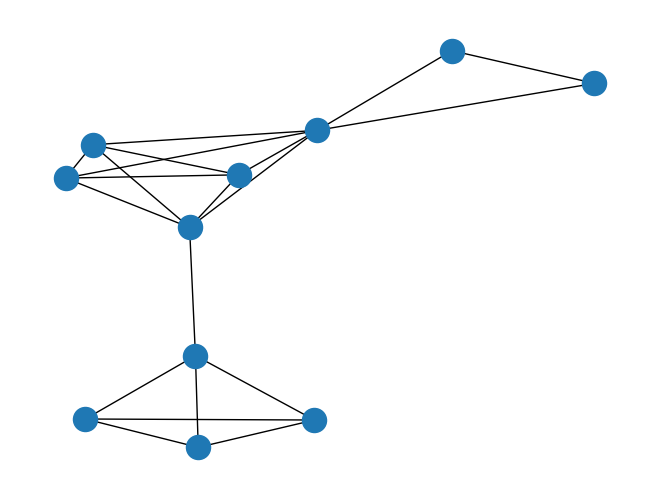

In [41]:
G1 = nx.complete_graph(4)
G1 = nx.relabel_nodes(G1, mapping={0:5, 1:6, 2:7, 3: 8})
G2 = nx.complete_graph(5)
G = nx.union(G1, G2)
G.add_edges_from([(0,5), (1, 9), (9,10), (10,1)])
nx.draw(G)


In [43]:
llyCurv = lly_curvature(G, double_edges=False)
steinerbergerCurv = steinerbergerCurvature(G)
edges_with_equal_lly_curv = find_keys_with_same_values(llyCurv)

print(llyCurv)
print(edges_with_equal_lly_curv)
print(steinerbergerCurv)

for edge_list in edges_with_equal_lly_curv:
    for i in range(len(edge_list)):
        for j in range(i+1, len(edge_list)):
            if (round(steinerbergerCurv[edge_list[i][0]],3) == round(steinerbergerCurv[edge_list[j][0]],3)) and (round(steinerbergerCurv[edge_list[i][1]],3) == round(steinerbergerCurv[edge_list[j][1]],3)):
                print("Passt")
            elif (round(steinerbergerCurv[edge_list[i][0]],3) == round(steinerbergerCurv[edge_list[j][1]],3)) and (round(steinerbergerCurv[edge_list[i][1]],3) == round(steinerbergerCurv[edge_list[j][0]],3)):
                print("Passt")
            else:
                print("Passt it")

{(5, 6): 0.833, (5, 7): 0.833, (5, 8): 0.833, (5, 0): -1.1, (6, 7): 1.333, (6, 8): 1.333, (7, 8): 1.333, (0, 1): 0.333, (0, 2): 0.85, (0, 3): 0.85, (0, 4): 0.85, (1, 2): 0.583, (1, 3): 0.583, (1, 4): 0.583, (1, 9): 0.167, (1, 10): 0.167, (2, 3): 1.25, (2, 4): 1.25, (3, 4): 1.25, (9, 10): 1.5}
[[(5, 6), (5, 7), (5, 8)], [(6, 7), (6, 8), (7, 8)], [(0, 2), (0, 3), (0, 4)], [(1, 2), (1, 3), (1, 4)], [(1, 9), (1, 10)], [(2, 3), (2, 4), (3, 4)]]
[-1.21472393 -1.88957055  0.80981595  0.80981595  0.80981595 -1.01226994
  1.01226994  1.01226994  1.01226994  1.34969325  1.34969325]
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt


## 3.1 Testing on random graphs

On random graphs, we don't get this kind of behaviour.

In [58]:
G=nx.erdos_renyi_graph(n=10, p=0.5)
llyCurv = lly_curvature(G, double_edges=False)
steinerbergerCurv = steinerbergerCurvature(G)
edges_with_equal_lly_curv = find_keys_with_same_values(llyCurv)

print(llyCurv)
print(edges_with_equal_lly_curv)
print(steinerbergerCurv)

for edge_list in edges_with_equal_lly_curv:
    for i in range(len(edge_list)):
        for j in range(i+1, len(edge_list)):
            if (round(steinerbergerCurv[edge_list[i][0]],3) == round(steinerbergerCurv[edge_list[j][0]],3)) and (round(steinerbergerCurv[edge_list[i][1]],3) == round(steinerbergerCurv[edge_list[j][1]],3)):
                print("Passt")
            elif (round(steinerbergerCurv[edge_list[i][0]],3) == round(steinerbergerCurv[edge_list[j][1]],3)) and (round(steinerbergerCurv[edge_list[i][1]],3) == round(steinerbergerCurv[edge_list[j][0]],3)):
                print("Passt")
            else:
                print("Passt it")
            """    
            if round(steinerbergerCurv[edge_list[i][0]],3) + round(steinerbergerCurv[edge_list[i][1]],3) == round(steinerbergerCurv[edge_list[j][0]],3) + round(steinerbergerCurv[edge_list[j][1]],3):
                print("Passt")
            else:
                print("Passt it")"""

{(0, 1): 0.3, (0, 6): 0.667, (1, 2): 0.4, (1, 4): 0.233, (1, 5): 0.55, (1, 8): 0.475, (2, 4): 0.933, (2, 7): 0.55, (2, 8): 0.7, (2, 9): 0.75, (3, 4): 0.667, (3, 7): 1.0, (3, 8): 0.417, (4, 7): 0.75, (4, 8): 0.75, (4, 9): 0.583, (5, 6): 0.583, (5, 8): 0.5, (5, 9): 0.5, (6, 8): 0.083, (7, 8): 0.5, (8, 9): 0.625}
[[(0, 6), (3, 4)], [(1, 5), (2, 7)], [(2, 9), (4, 7), (4, 8)], [(4, 9), (5, 6)], [(5, 8), (5, 9), (7, 8)]]
[ 2.00000000e+01 -1.00000000e+01 -1.00000000e+01  6.21724894e-15
 -1.00000000e+01  8.88178420e-15 -2.00000000e+01  1.00000000e+01
  1.00000000e+01  1.00000000e+01]
Passt it
Passt it
Passt
Passt
Passt
Passt it
Passt
Passt it
Passt it
